Kaggle Weather Prediction Dataset Used:

- https://www.kaggle.com/datasets/ananthr1/weather-prediction

Loading the Libraries Needed

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Importing the Weather Dataset

In [49]:
df = pd.read_csv("./dataset/weather_dataset.csv")

Checking the Dataset

In [50]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Dropping the Unnecessary Columns

In [51]:
df.drop(["date"], inplace=True, axis=1)

In [52]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [53]:
df.shape

(1461, 5)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [55]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Checking the Weather Class with their Corresponding Number of rows.

In [56]:
df[["weather"]].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
dtype: int64

Checking if the Dataset has any NA or NULL values.

In [57]:
df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

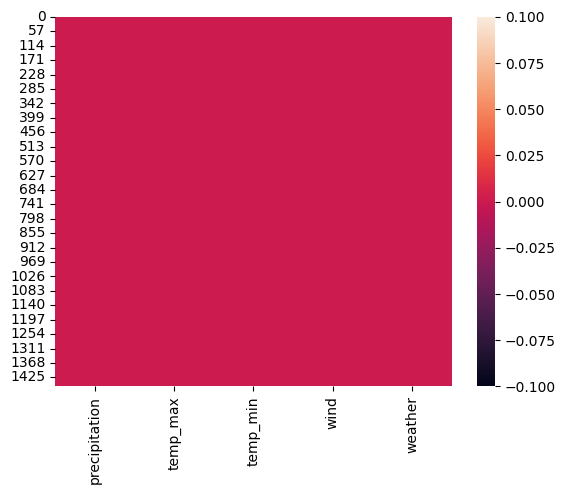

In [58]:
sns.heatmap(df.isnull())

<Axes: >

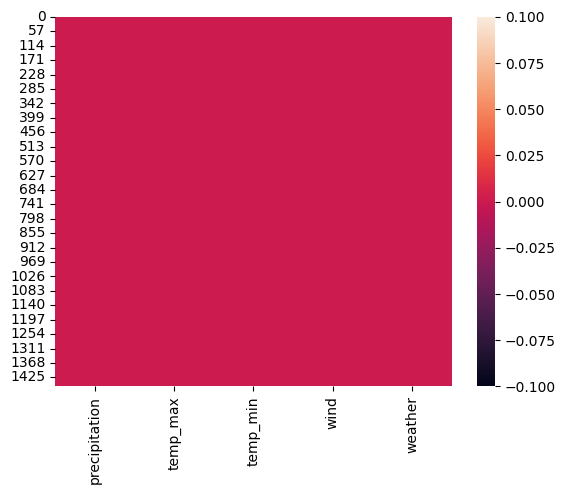

In [59]:
sns.heatmap(df.isna())

The Dataset has a total of 1461 Rows.

<Axes: >

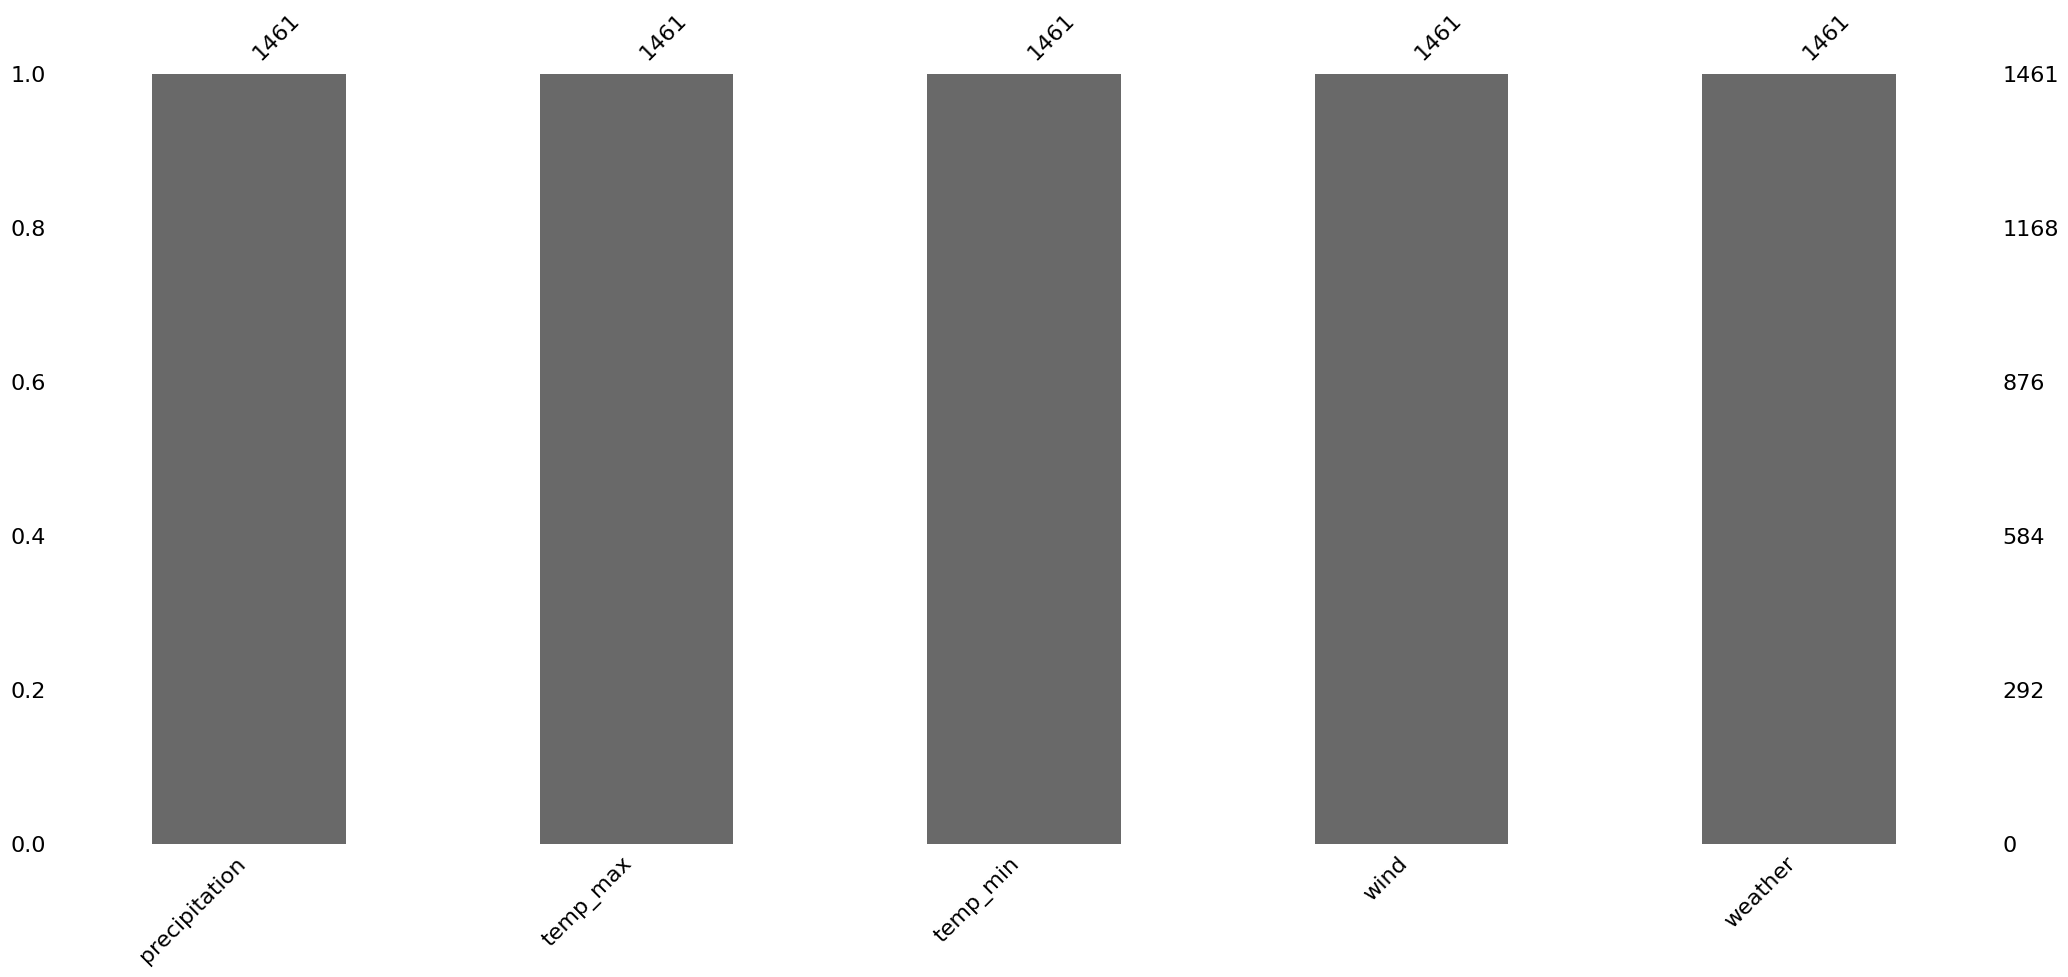

In [60]:
msno.bar(df)

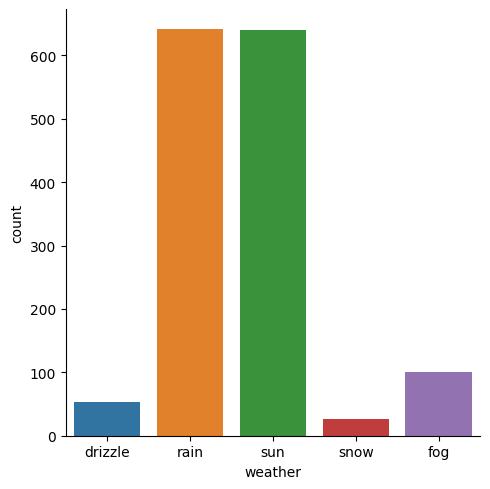

In [61]:
sns.catplot(x="weather", data=df, kind="count")

Replacing Each Class in the Weather Column to a Numeric Value 0, 1, 2, 3 and 4

In [62]:
df.weather = df.weather.replace({"drizzle": 0, "rain": 1, "sun": 2, "snow": 3, "fog": 4})

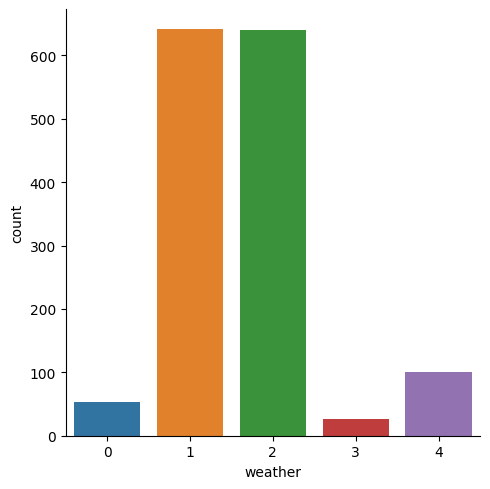

In [63]:
sns.catplot(x="weather", data=df, kind="count")

Since the Dataset is unbalanced, for the Training of the Machine Learning Model, is going to be used only 26 Rows for each Weather Class

In [64]:
df_0 = df[df['weather']==0]
df_1 = df[df['weather']==1]
df_2 = df[df['weather']==2]
df_3 = df[df['weather']==3]
df_4 = df[df['weather']==4]

df_0 = df_0.sample(26)
df_1 = df_1.sample(26)
df_2 = df_2.sample(26)
df_3 = df_3.sample(26)
df_4 = df_4.sample(26)

df_balanced = pd.concat([df_0, df_1, df_2, df_3, df_4])

In [65]:
df_balanced.head()

,precipitation,temp_max,temp_min,wind,weather
207,0.0,25.6,12.8,2.2,0
284,0.0,13.9,7.2,1.3,0
386,0.0,2.2,-1.7,1.1,0
364,0.0,4.4,0.0,1.8,0
186,0.0,24.4,10.6,3.1,0


In [66]:
df_balanced.shape

(130, 5)

New Weather Dataset where each Weather Class is balanced.

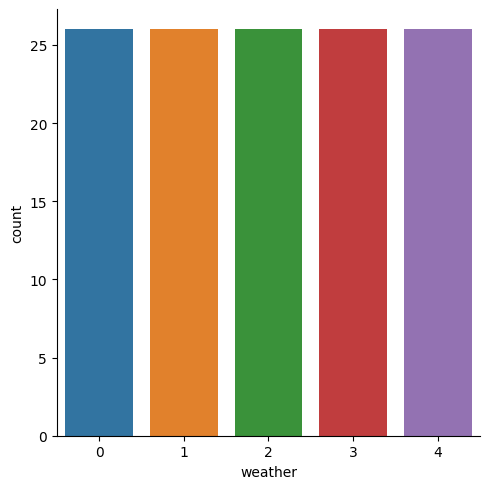

In [67]:
sns.catplot(x="weather", data=df_balanced, kind="count")

In [2]:
import numpy as np

In [5]:
row_1 = np.array(["Drizzle", 26])
row_2 = np.array(["Rain", 26])
row_3 = np.array(["Sun", 26])
row_4 = np.array(["Snow", 26])
row_5 = np.array(["Fog", 26])

data = pd.DataFrame([row_1], columns=["Weather", "Number of that Class"])

data.loc[len(data.index)] = row_2
data.loc[len(data.index)] = row_3
data.loc[len(data.index)] = row_4
data.loc[len(data.index)] = row_5

In [6]:
data

,Weather,Number of that Class
0,Drizzle,26
1,Rain,26
2,Sun,26
3,Snow,26
4,Fog,26


In [7]:
data.to_csv("./assets/weather_classes.csv")

Heatmap of the Dataset

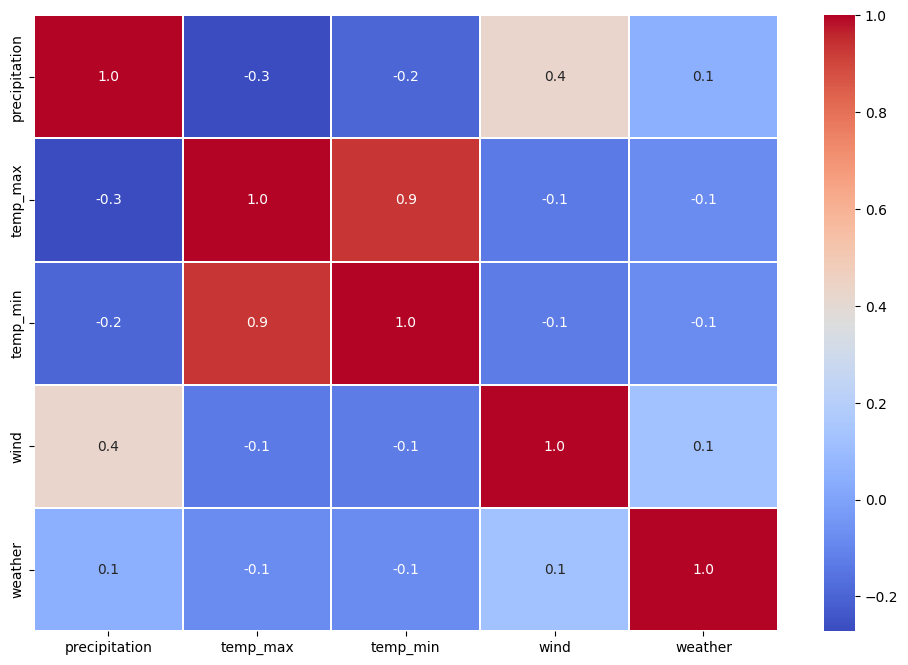

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(df_balanced.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [69]:
X = df_balanced.iloc[:, 0:-1]
y = df_balanced.iloc[:, -1]

In [70]:
X.head()

,precipitation,temp_max,temp_min,wind
207,0.0,25.6,12.8,2.2
284,0.0,13.9,7.2,1.3
386,0.0,2.2,-1.7,1.1
364,0.0,4.4,0.0,1.8
186,0.0,24.4,10.6,3.1


In [71]:
y.head()

207    0
284    0
386    0
364    0
186    0
Name: weather, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Splitting the Data to Train and Test Datasets, and then Each X Feature is going to be Scaled.

In [73]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

Importing KNeighborsClassifier Algorithm

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
y_predicted = knn_model.predict(X_test)

In [78]:
score = knn_model.score(X_test, y_test)

print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.6923076923076923
accuracy_score percent : 69.23


In [79]:
from sklearn.metrics import classification_report

KNeighborsClassifier Validation Results

In [80]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.80      0.67      0.73         6
           2       1.00      0.43      0.60         7
           3       0.67      1.00      0.80         4
           4       0.80      0.80      0.80         5

    accuracy                           0.69        26
   macro avg       0.74      0.73      0.69        26
weighted avg       0.78      0.69      0.69        26



Importing GaussianNB Algorithm

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

GaussianNB Validation Results

In [83]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       1.00      1.00      1.00         6
           2       0.67      0.57      0.62         7
           3       1.00      1.00      1.00         4
           4       0.25      0.20      0.22         5

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.65        26



Importing SVC Algorithm

In [84]:
from sklearn.svm import SVC

In [85]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

SVC Validation Results

In [86]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       1.00      0.83      0.91         6
           2       0.57      0.57      0.57         7
           3       0.80      1.00      0.89         4
           4       0.33      0.40      0.36         5

    accuracy                           0.65        26
   macro avg       0.67      0.66      0.66        26
weighted avg       0.67      0.65      0.66        26



Importing RandomForestClassifier Algorithm

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier()

RandomForestClassifier Validation Results

In [89]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.83      0.83      0.83         6
           2       0.60      0.43      0.50         7
           3       0.75      0.75      0.75         4
           4       0.33      0.20      0.25         5

    accuracy                           0.54        26
   macro avg       0.55      0.54      0.53        26
weighted avg       0.57      0.54      0.54        26



Importing SGDClassifier Algorithm

In [90]:
from sklearn.linear_model import SGDClassifier

SGDClassifier Validation Results

In [91]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.83      0.83      0.83         6
           2       0.60      0.43      0.50         7
           3       0.75      0.75      0.75         4
           4       0.33      0.20      0.25         5

    accuracy                           0.54        26
   macro avg       0.55      0.54      0.53        26
weighted avg       0.57      0.54      0.54        26



In conclusion, despite the Best M.L. Algorithm did only 69% of Accuracy, this Results are quite good because the Dataset of each Class is balanced, if the Weather Data is not balanced, the Accuracy may be higher but this is a false and unbiased result.

To improve the Accuracy of the Model, is needed a Weather Dataset more large, and also balanced.

Saving the KNeighborsClassifier Model and the Scaler

In [92]:
import pickle as pkl

In [93]:
pkl.dump(scaler, open(f"./model/scaler.pkl", "wb"))

In [95]:
pkl.dump(knn_model, open(f"./model/weather_model.pkl", "wb"))